In [1]:
import Sfilter
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [24]:
base1 = Path("/home/chui/E29Project-2023-04-11/052-TRAAK-double-CYC/02-double-CYS-Charmm/01-C_1.00/05-prod/")
file_list = [base1/f"{i:02d}/analysis/04-state-code/POT_perm_event.out" for i in range(10)]
p_events1 = Sfilter.Perm_event_output(file_list)
base1 = Path("/home/chui/E29Project-2023-04-11/052-TRAAK-double-CYC/02-double-CYS-Charmm//07-C_0.70/05-prod/")
file_list = [base1/f"{i:02d}/analysis/04-state-code/POT_perm_event.out" for i in range(10)]
p_events2 = Sfilter.Perm_event_output(file_list)

(-5.0, 1005.0)

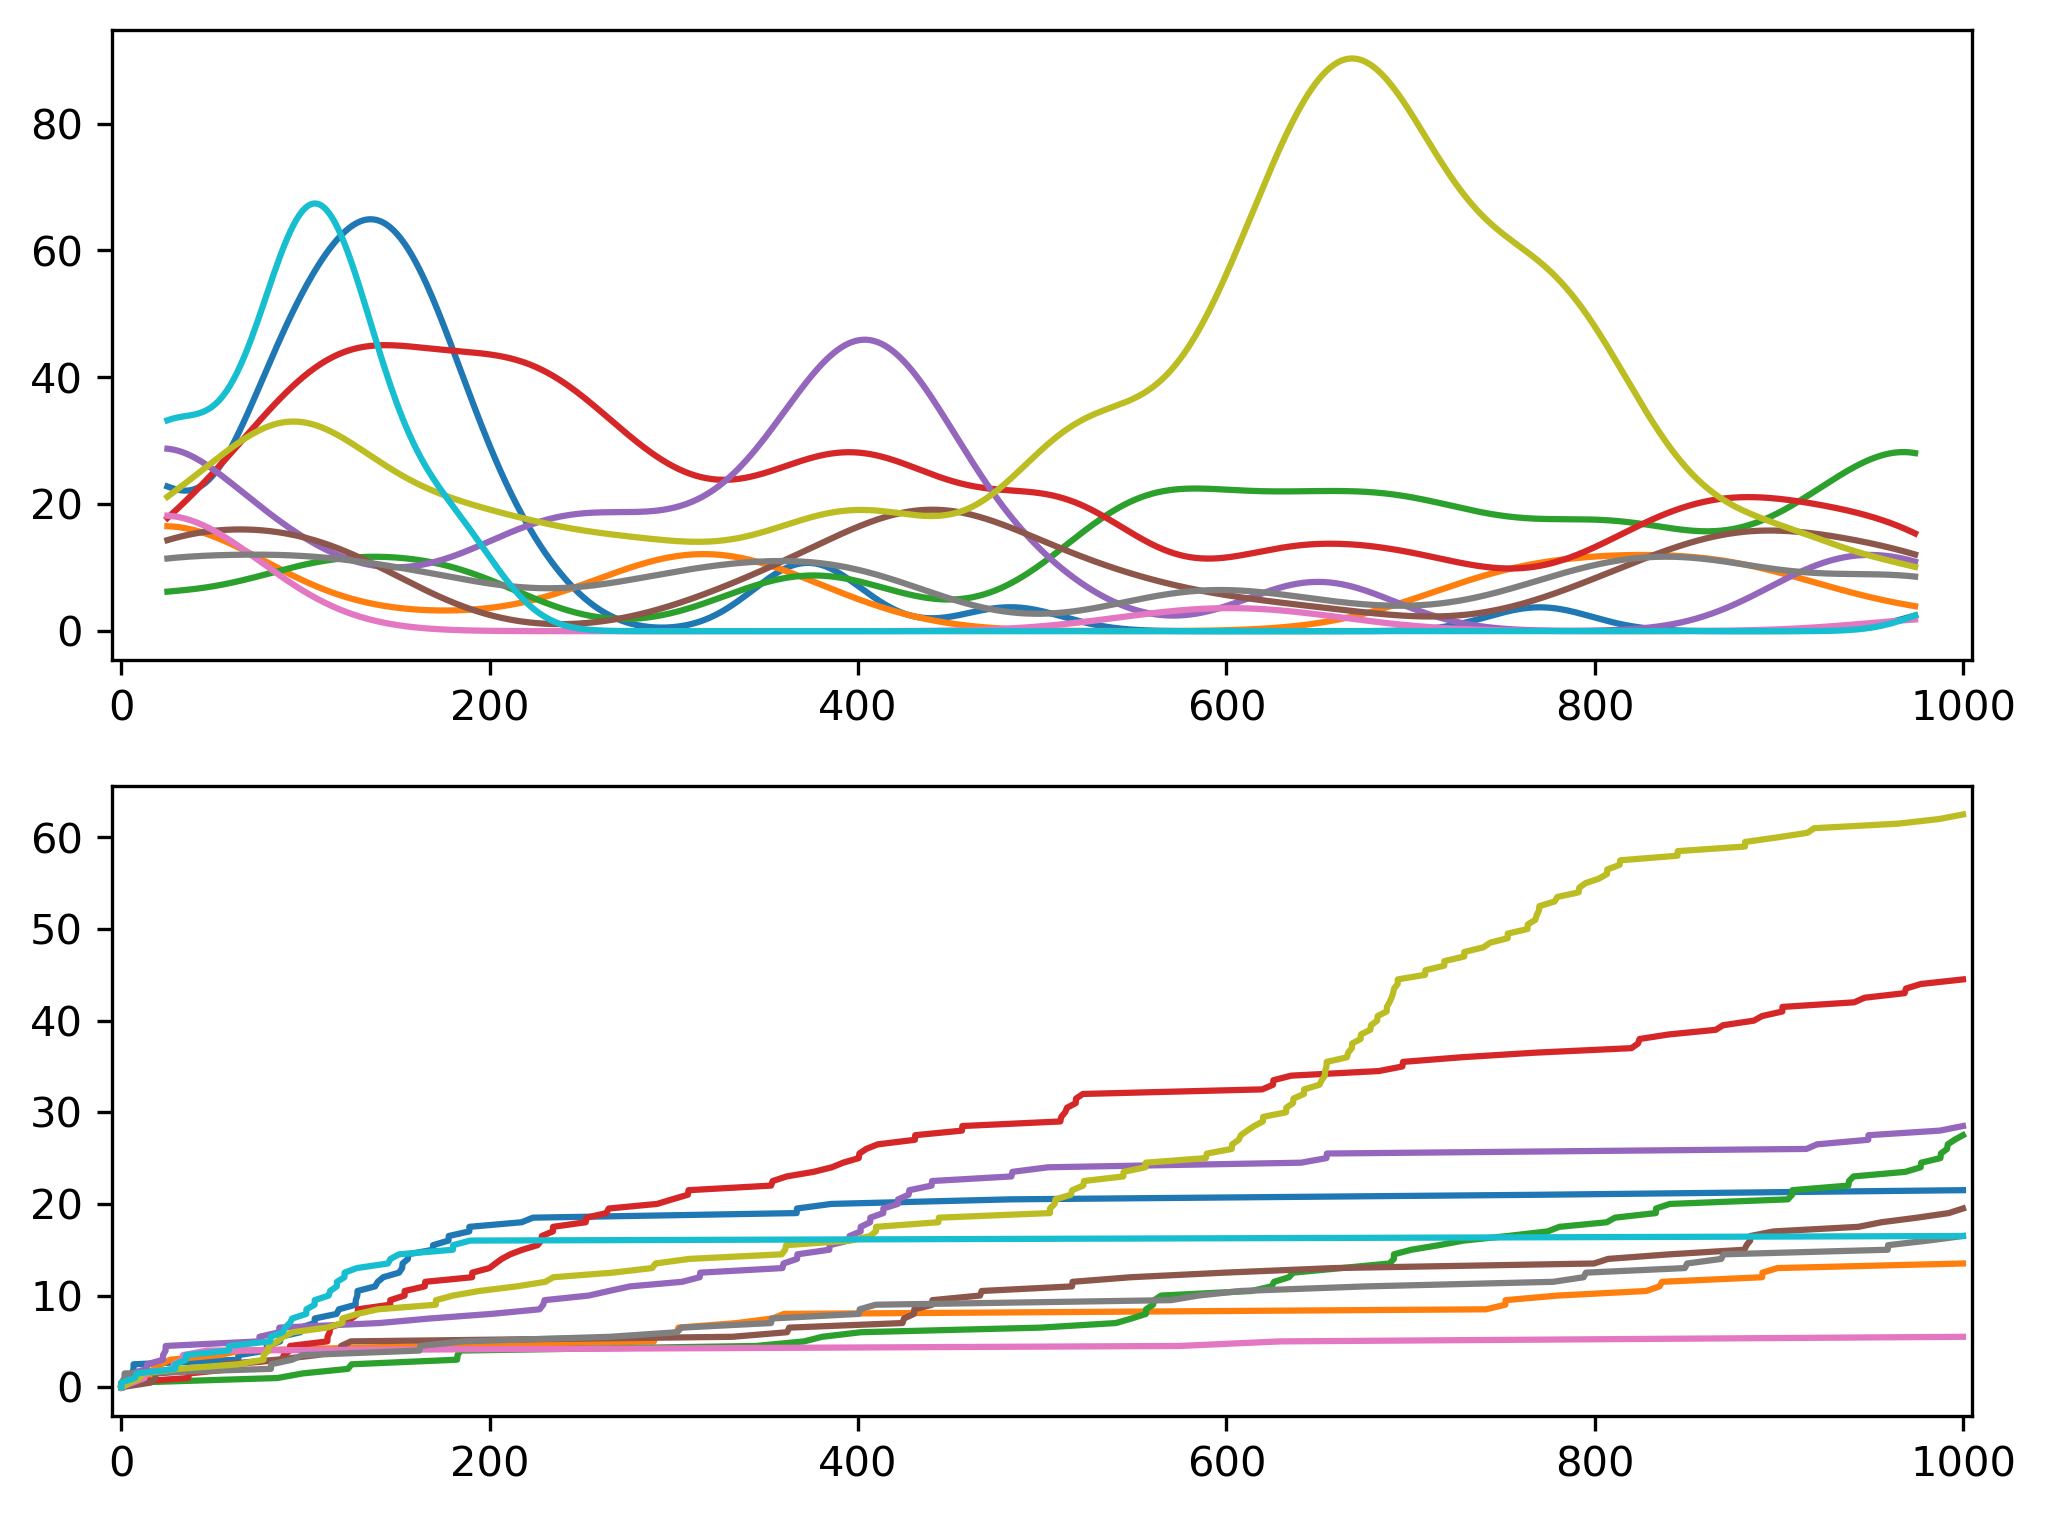

In [25]:
x_bin = np.linspace(25000,975000,975-25+1, endpoint=False)
y_list, (u_list, d_list) = p_events1.get_kde_conductance(evaluation_points=x_bin, event_seqaration=2, bandwidth=0.15)
fig, (ax1, ax2) = plt.subplots(2,1,dpi=300, figsize=(8,6))
for y in y_list:
    ax1.plot(x_bin/1000, y)
for traj in u_list:
    x = sorted([item/1000 for event in traj for item in event])
    y = np.arange(len(x))/2
    ax2.plot(x,y)
ax1.set_xlim(-5,1005)
ax2.set_xlim(-5,1005)

In [26]:
conduct = p_events1.get_conductance(300)
b_res = p_events1.get_bootstrap_conductance(300)

In [27]:
print(f"{conduct[0]:.1f} ± {conduct[1]:.1f}")
print(b_res.confidence_interval.low)
print(b_res.confidence_interval.high)

13.9 ± 2.8
9.8266833552
20.8817021298


(-5.0, 505.0)

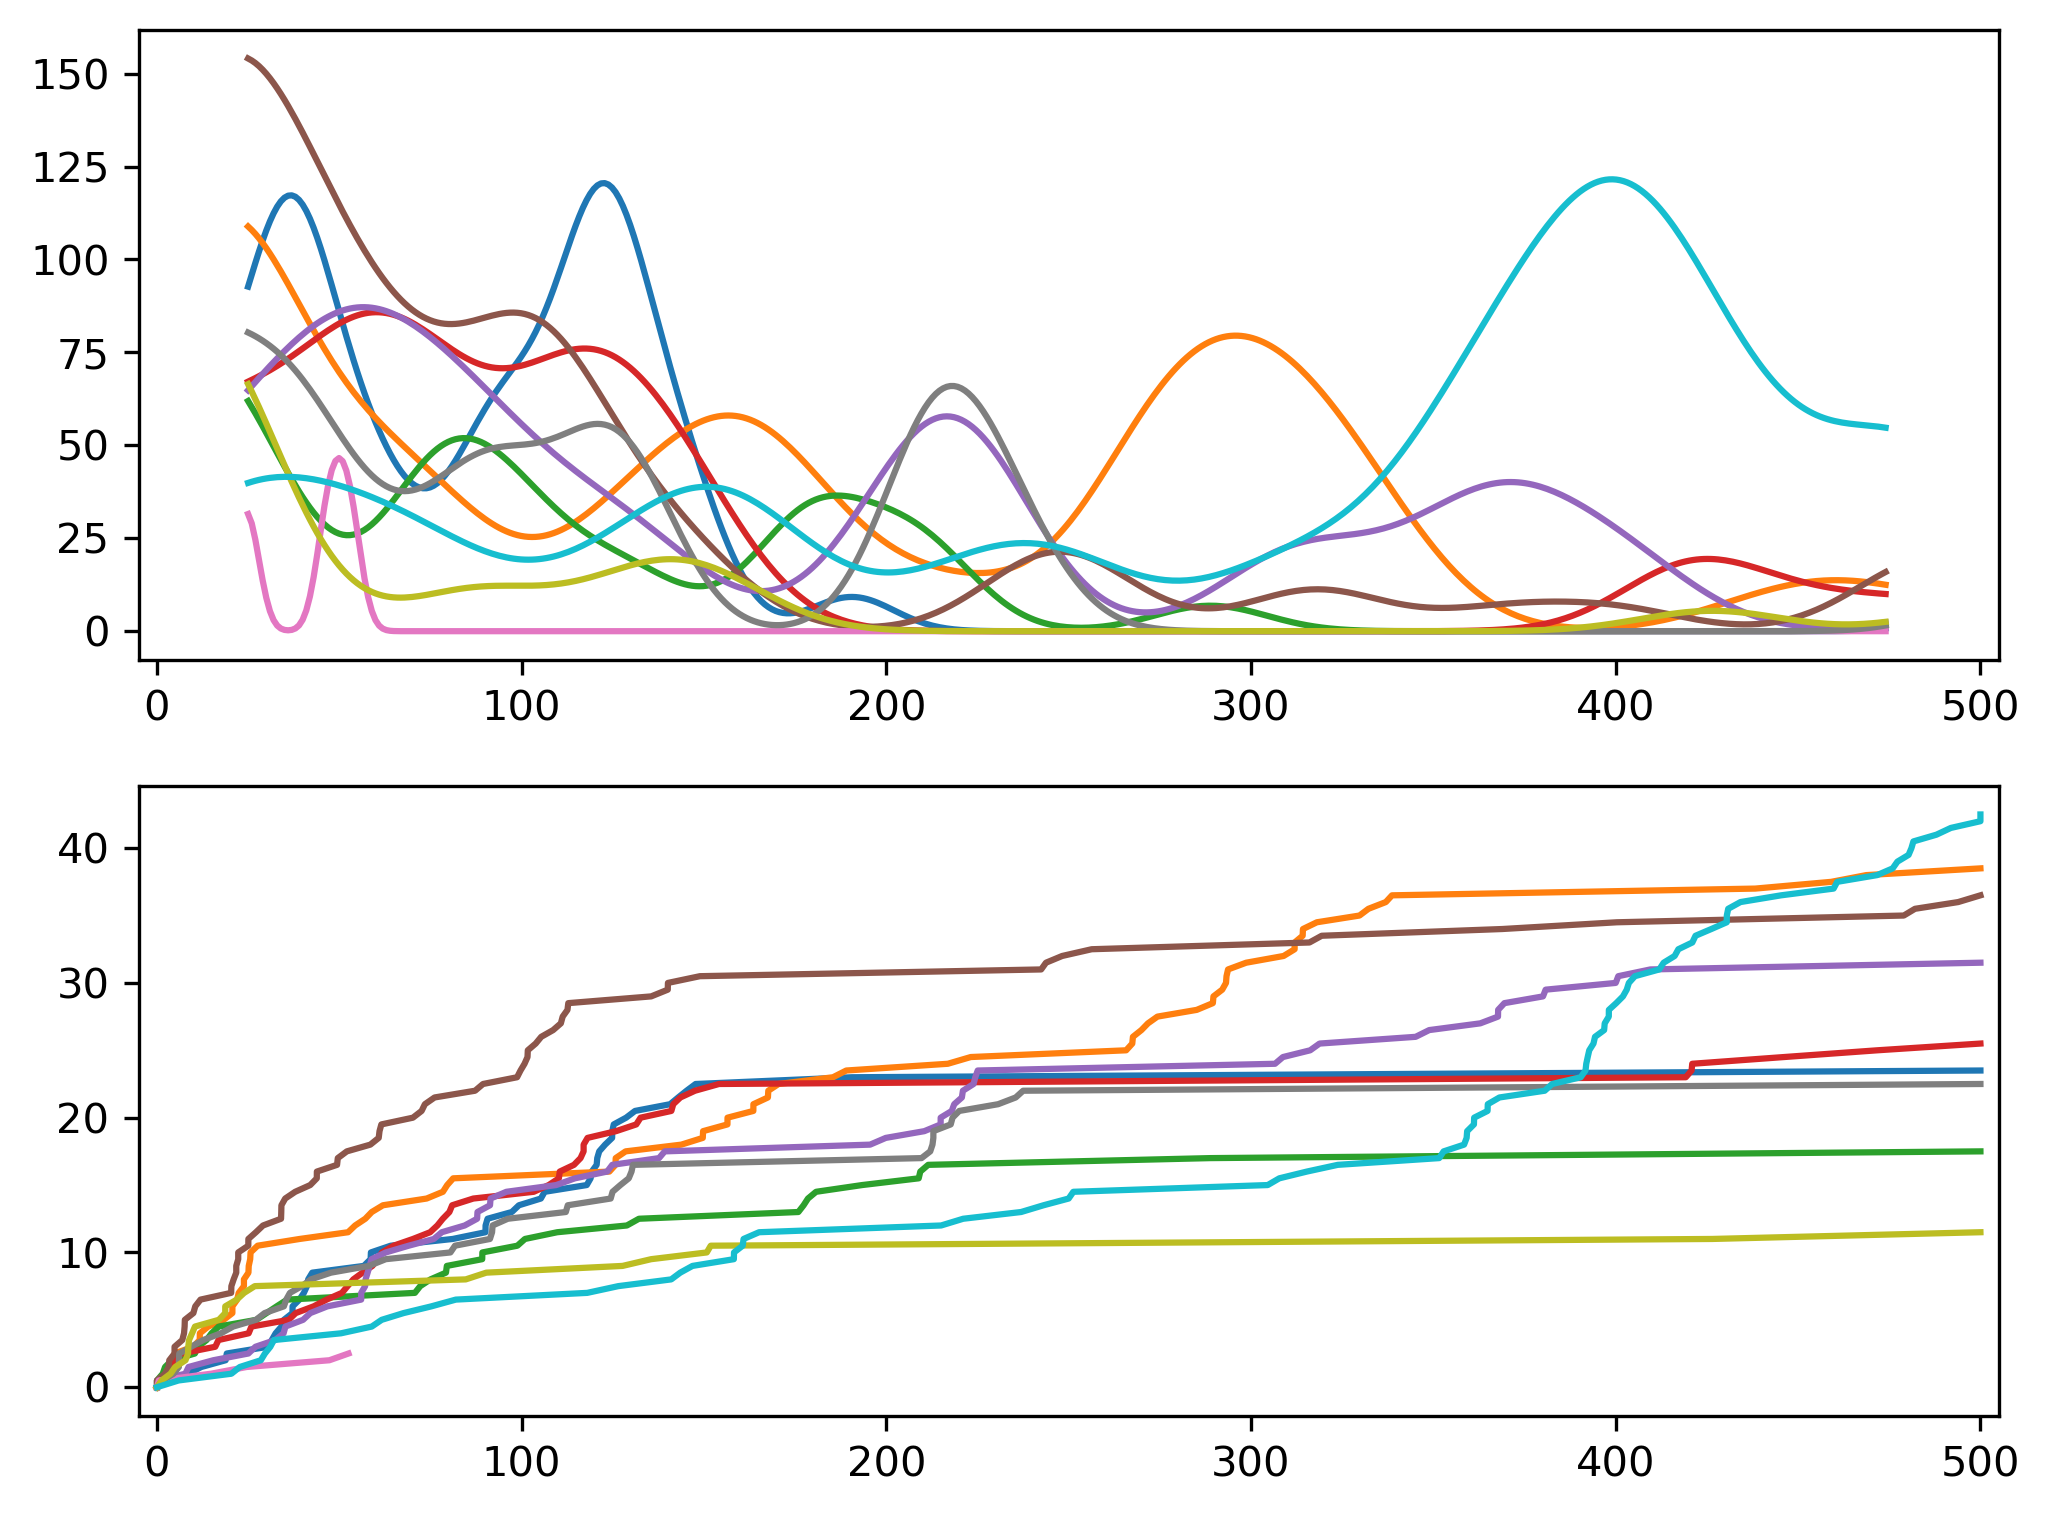

In [28]:
x_bin = np.linspace(25000,475000,475-25+1, endpoint=False)
y_list, (u_list, d_list) = p_events2.get_kde_conductance(evaluation_points=x_bin, event_seqaration=2, bandwidth=0.15)
fig, (ax1, ax2) = plt.subplots(2,1,dpi=300, figsize=(8,6))
for y in y_list:
    ax1.plot(x_bin/1000, y)
for traj in u_list:
    x = sorted([item/1000 for event in traj for item in event])
    y = np.arange(len(x))/2
    ax2.plot(x,y)
ax1.set_xlim(-5,505)
ax2.set_xlim(-5,505)